In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



## Spellman Yeast Cell Cycle Expression Data

To illustrate a data wrangling pipeline, we’re going to use a gene expression microarray data set, based on the following paper:

   * Spellman PT, et al. 1998. Comprehensive identification of cell cycle-regulated genes of the yeast Saccharomyces cerevisiae by microarray hybridization. Mol Biol Cell 9(12): 3273-97.

In this paper, Spellman and colleagues tried to identify all the genes in the yeast genome (>6000 genes) that exhibited oscillatory behaviors suggestive of cell cycle regulation. To do so, they combined gene expression measurements from six different types of cell cycle synchronization experiments.

The six types of cell cycle synchronization experiments included in this data set are:

* synchronization by alpha-factor = “alpha”
* synchronization by cdc15 temperature sensitive mutants = “cdc15”
* synchronization by cdc28 temperature sensitive mutants = “cdc28”
* synchronization by elutration = “elu”
* synchronization by cln3 mutatant strains = “cln3”
* synchronization by clb2 mutant strains = “clb2”

The Spellman data is available at:

 * [spellman-combined.txt](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/spellman-combined.txt) -- tab-delimited file


## Yeast SGDID to Common Name table


To illustrating merging or joining data sources, we’ll add information about each genes “common name” and a description of the gene functions to our Spellman data set. I’ve prepared a file with this info based on info I downloaded from the Saccharomyces Genome Database.  The file is available at:

* [yeast-ORF-info.csv](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/yeast-ORF-info.csv)





## Seaborn

Seaborn is a high-level plotting library, built on top of Matplotlib.  Seaborn specializes in making common statistical plots easy to generate.

Seaborn has some conceptual similarities to ggplot2, but with a different syntax and approach.  The figure below, from the Seaborn documentation, illustrates the three major plot classes that Seaborn generates, along with their sub-types.


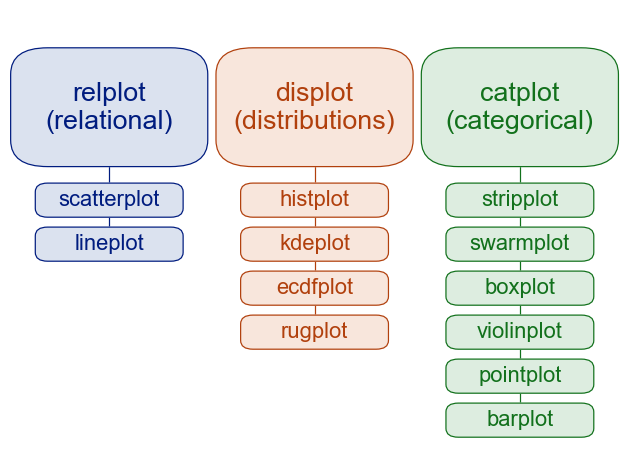

### More like ggplot2 please?

If you want to use seaborn in an even more ggplot2 like fashion, see the experimental ["Seaborn object interface"](https://seaborn.pydata.org/tutorial/objects_interface)


## Read and explore the Spellman data

In [7]:
yeast = pd.read_table("spellman-combined.txt", sep="\t")

In [8]:
yeast.columns

Index(['Unnamed: 0', 'cln3-1', 'cln3-2', 'clb', 'clb2-2', 'clb2-1', 'alpha',
       'alpha0', 'alpha7', 'alpha14', 'alpha21', 'alpha28', 'alpha35',
       'alpha42', 'alpha49', 'alpha56', 'alpha63', 'alpha70', 'alpha77',
       'alpha84', 'alpha91', 'alpha98', 'alpha105', 'alpha112', 'alpha119',
       'cdc15', 'cdc15_10', 'cdc15_30', 'cdc15_50', 'cdc15_70', 'cdc15_80',
       'cdc15_90', 'cdc15_100', 'cdc15_110', 'cdc15_120', 'cdc15_130',
       'cdc15_140', 'cdc15_150', 'cdc15_160', 'cdc15_170', 'cdc15_180',
       'cdc15_190', 'cdc15_200', 'cdc15_210', 'cdc15_220', 'cdc15_230',
       'cdc15_240', 'cdc15_250', 'cdc15_270', 'cdc15_290', 'cdc28', 'cdc28_0',
       'cdc28_10', 'cdc28_20', 'cdc28_30', 'cdc28_40', 'cdc28_50', 'cdc28_60',
       'cdc28_70', 'cdc28_80', 'cdc28_90', 'cdc28_100', 'cdc28_110',
       'cdc28_120', 'cdc28_130', 'cdc28_140', 'cdc28_150', 'cdc28_160', 'elu',
       'elu0', 'elu30', 'elu60', 'elu90', 'elu120', 'elu150', 'elu180',
       'elu210', 'elu240', 'elu270

In [9]:
yeast.shape

(6178, 83)

In [10]:
yeast.head(3)

,Unnamed: 0,cln3-1,cln3-2,clb,clb2-2,clb2-1,alpha,alpha0,alpha7,alpha14,...,elu120,elu150,elu180,elu210,elu240,elu270,elu300,elu330,elu360,elu390
0,YAL001C,0.15,NaN,NaN,-0.22,0.07,NaN,-0.15,-0.15,-0.21,...,-0.24,0.11,-0.12,0.37,0.07,-0.09,-0.32,0.04,-0.48,0.04
1,YAL002W,-0.07,-0.76,NaN,-0.12,-0.25,NaN,-0.11,0.10,0.01,...,0.03,-0.08,-0.13,-0.21,-0.06,-0.10,-0.19,0.08,0.01,-0.02
2,YAL003W,-1.22,-0.27,NaN,-0.10,0.23,NaN,-0.14,-0.71,0.10,...,0.18,0.28,0.15,0.40,0.24,0.22,-0.27,-0.10,0.34,0.02


### Fix column names

In [11]:
yeast.rename(columns={"Unnamed: 0":"Gene"}, inplace=True)

In [12]:
yeast.head()

,Gene,cln3-1,cln3-2,clb,clb2-2,clb2-1,alpha,alpha0,alpha7,alpha14,...,elu120,elu150,elu180,elu210,elu240,elu270,elu300,elu330,elu360,elu390
0,YAL001C,0.15,NaN,NaN,-0.22,0.07,NaN,-0.15,-0.15,-0.21,...,-0.24,0.11,-0.12,0.37,0.07,-0.09,-0.32,0.04,-0.48,0.04
1,YAL002W,-0.07,-0.76,NaN,-0.12,-0.25,NaN,-0.11,0.10,0.01,...,0.03,-0.08,-0.13,-0.21,-0.06,-0.10,-0.19,0.08,0.01,-0.02
2,YAL003W,-1.22,-0.27,NaN,-0.10,0.23,NaN,-0.14,-0.71,0.10,...,0.18,0.28,0.15,0.40,0.24,0.22,-0.27,-0.10,0.34,0.02
3,YAL004W,-0.09,1.20,NaN,0.16,-0.14,NaN,-0.02,-0.48,-0.11,...,-0.15,-0.73,-0.79,-0.20,0.34,0.07,-0.59,0.35,0.66,0.32
4,YAL005C,-0.60,1.01,NaN,0.24,0.65,NaN,-0.05,-0.53,-0.47,...,-0.45,-0.83,-0.26,-0.16,0.30,0.21,-0.43,0.21,0.60,0.65


### Drop empty columns

In [13]:
yclean = yeast.dropna(axis=1, how="all")

In [14]:
yclean.head()

,Gene,cln3-1,cln3-2,clb2-2,clb2-1,alpha0,alpha7,alpha14,alpha21,alpha28,...,elu120,elu150,elu180,elu210,elu240,elu270,elu300,elu330,elu360,elu390
0,YAL001C,0.15,NaN,-0.22,0.07,-0.15,-0.15,-0.21,0.17,-0.42,...,-0.24,0.11,-0.12,0.37,0.07,-0.09,-0.32,0.04,-0.48,0.04
1,YAL002W,-0.07,-0.76,-0.12,-0.25,-0.11,0.10,0.01,0.06,0.04,...,0.03,-0.08,-0.13,-0.21,-0.06,-0.10,-0.19,0.08,0.01,-0.02
2,YAL003W,-1.22,-0.27,-0.10,0.23,-0.14,-0.71,0.10,-0.32,-0.40,...,0.18,0.28,0.15,0.40,0.24,0.22,-0.27,-0.10,0.34,0.02
3,YAL004W,-0.09,1.20,0.16,-0.14,-0.02,-0.48,-0.11,0.12,-0.03,...,-0.15,-0.73,-0.79,-0.20,0.34,0.07,-0.59,0.35,0.66,0.32
4,YAL005C,-0.60,1.01,0.24,0.65,-0.05,-0.53,-0.47,-0.06,0.11,...,-0.45,-0.83,-0.26,-0.16,0.30,0.21,-0.43,0.21,0.60,0.65


### Drop columns using str attribute and str.match

In [15]:
todrop = yclean.columns[yclean.columns.str.match("cln|clb")]
yclean = yclean.drop(todrop, axis=1)

In [16]:
yclean.head()

,Gene,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,...,elu120,elu150,elu180,elu210,elu240,elu270,elu300,elu330,elu360,elu390
0,YAL001C,-0.15,-0.15,-0.21,0.17,-0.42,-0.44,-0.15,0.24,-0.10,...,-0.24,0.11,-0.12,0.37,0.07,-0.09,-0.32,0.04,-0.48,0.04
1,YAL002W,-0.11,0.10,0.01,0.06,0.04,-0.26,0.04,0.19,-0.22,...,0.03,-0.08,-0.13,-0.21,-0.06,-0.10,-0.19,0.08,0.01,-0.02
2,YAL003W,-0.14,-0.71,0.10,-0.32,-0.40,-0.58,0.11,0.21,0.09,...,0.18,0.28,0.15,0.40,0.24,0.22,-0.27,-0.10,0.34,0.02
3,YAL004W,-0.02,-0.48,-0.11,0.12,-0.03,0.19,0.13,0.76,0.07,...,-0.15,-0.73,-0.79,-0.20,0.34,0.07,-0.59,0.35,0.66,0.32
4,YAL005C,-0.05,-0.53,-0.47,-0.06,0.11,-0.07,0.25,0.46,0.12,...,-0.45,-0.83,-0.26,-0.16,0.30,0.21,-0.43,0.21,0.60,0.65


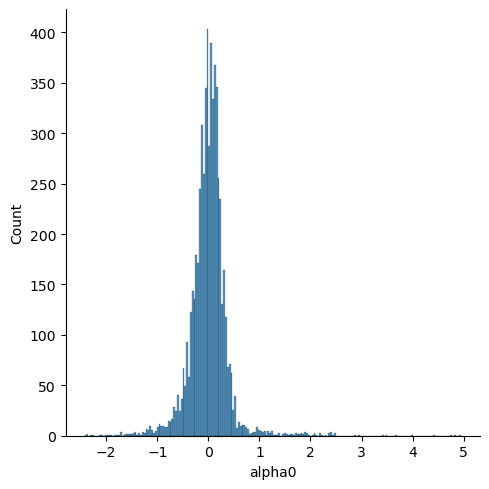

In [17]:
sns.displot(data = yclean, x="alpha0")
pass

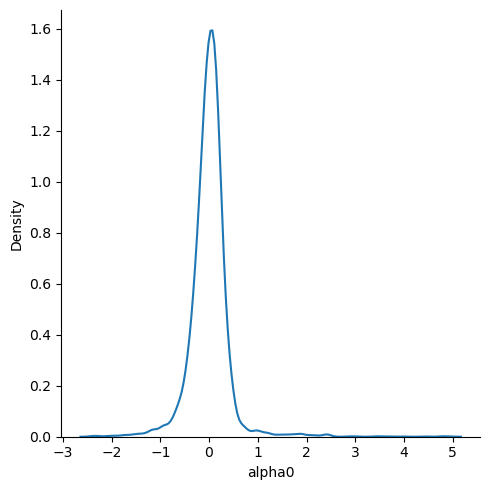

In [18]:
sns.displot(data = yclean, x="alpha0", kind="kde")
pass

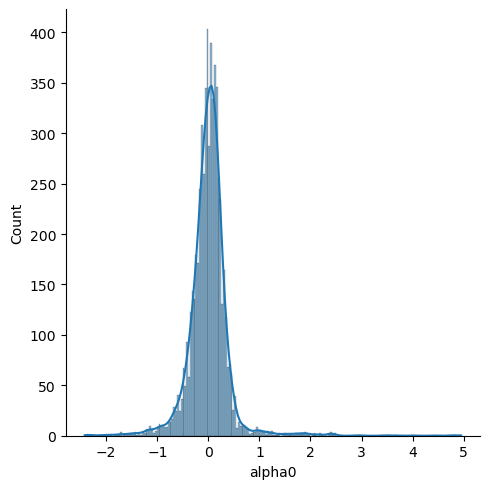

In [19]:
sns.displot(data = yclean, x="alpha0", kind="hist", kde=True)

In [20]:
cleanT = yclean.set_index("Gene").T
cleanT

Gene,YAL001C,YAL002W,YAL003W,YAL004W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,...,YPR195C,YPR196W,YPR197C,YPR198W,YPR199C,YPR200C,YPR201W,YPR202W,YPR203W,YPR204W
alpha0,-0.15,-0.11,-0.14,-0.02,-0.05,-0.60,-0.28,-0.03,-0.05,-0.31,...,-0.26,0.04,-0.11,0.23,0.14,-0.09,0.14,-0.79,-0.68,-0.37
alpha7,-0.15,0.10,-0.71,-0.48,-0.53,-0.45,-0.22,-0.27,0.13,-0.43,...,0.24,0.20,-0.16,-0.03,0.09,0.04,NaN,-0.25,-0.19,-0.48
alpha14,-0.21,0.01,0.10,-0.11,-0.47,-0.13,-0.06,0.17,0.13,-0.30,...,0.10,-0.18,0.47,0.43,0.25,-0.06,0.31,1.18,1.23,0.97
alpha21,0.17,0.06,-0.32,0.12,-0.06,0.35,0.22,-0.12,-0.21,-0.23,...,NaN,0.41,0.52,-0.06,-0.02,-0.07,-0.19,0.84,0.84,0.52
alpha28,-0.42,0.04,-0.40,-0.03,0.11,-0.01,0.25,-0.27,-0.45,-0.13,...,0.07,-0.13,0.13,0.29,0.00,-0.16,0.08,0.19,0.14,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
elu270,-0.09,-0.10,0.22,0.07,0.21,-0.16,-0.04,-0.65,0.02,0.11,...,-0.60,-0.16,0.24,-0.02,-0.30,-0.15,-0.37,0.38,0.40,0.25
elu300,-0.32,-0.19,-0.27,-0.59,-0.43,0.29,-0.02,-0.07,0.34,-0.13,...,-0.32,0.38,-0.42,0.09,0.00,0.14,0.17,-0.16,-0.37,-0.34
elu330,0.04,0.08,-0.10,0.35,0.21,-0.06,0.19,-0.35,0.05,-0.09,...,-0.24,0.01,0.21,0.41,-0.11,-0.07,-0.04,0.37,0.17,0.55
elu360,-0.48,0.01,0.34,0.66,0.60,-0.26,-0.42,-0.19,-0.93,-0.01,...,-0.19,-0.46,-0.26,0.00,-0.30,-0.72,-0.45,-0.04,0.09,0.22


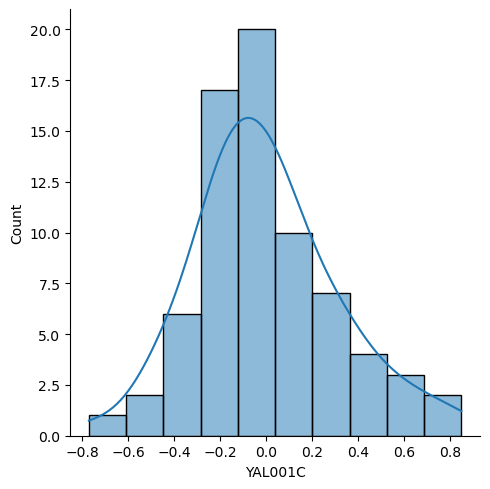

In [21]:
sns.displot(data = cleanT, x="YAL001C", kind="hist", kde=True)

### Wide to long format using `melt`

In [22]:
ylong = yclean.melt(id_vars=["Gene"], 
                    var_name = "Expt_Time", value_name="Expression")

In [23]:
ylong.head()

,Gene,Expt_Time,Expression
0,YAL001C,alpha0,-0.15
1,YAL002W,alpha0,-0.11
2,YAL003W,alpha0,-0.14
3,YAL004W,alpha0,-0.02
4,YAL005C,alpha0,-0.05


### Split the Expt/Time column

In [24]:
(ylong.Expt_Time.
     str.replace("alpha", "alpha_").
     str.replace("elu", "elu_")
)

0         alpha_0
1         alpha_0
2         alpha_0
3         alpha_0
4         alpha_0
           ...   
450989    elu_390
450990    elu_390
450991    elu_390
450992    elu_390
450993    elu_390
Name: Expt_Time, Length: 450994, dtype: object

In [25]:
ylong.Expt_Time = (
    ylong.Expt_Time.
    str.replace("alpha", "alpha_").
    str.replace("elu", "elu_")
)
ylong.head()

,Gene,Expt_Time,Expression
0,YAL001C,alpha_0,-0.15
1,YAL002W,alpha_0,-0.11
2,YAL003W,alpha_0,-0.14
3,YAL004W,alpha_0,-0.02
4,YAL005C,alpha_0,-0.05


In [26]:
ylong.Expt_Time.str.split("_", expand=True)

,0,1
0,alpha,0
1,alpha,0
2,alpha,0
3,alpha,0
4,alpha,0
...,...,...
450989,elu,390
450990,elu,390
450991,elu,390
450992,elu,390


In [27]:
ylong[["Expt", "Time"]] = ylong.Expt_Time.str.split("_", expand=True)
ylong.head()

,Gene,Expt_Time,Expression,Expt,Time
0,YAL001C,alpha_0,-0.15,alpha,0
1,YAL002W,alpha_0,-0.11,alpha,0
2,YAL003W,alpha_0,-0.14,alpha,0
3,YAL004W,alpha_0,-0.02,alpha,0
4,YAL005C,alpha_0,-0.05,alpha,0


### Drop and reorder columns

In [28]:
ylong.drop("Expt_Time", axis=1)[["Gene","Expt","Time","Expression"]]

,Gene,Expt,Time,Expression
0,YAL001C,alpha,0,-0.15
1,YAL002W,alpha,0,-0.11
2,YAL003W,alpha,0,-0.14
3,YAL004W,alpha,0,-0.02
4,YAL005C,alpha,0,-0.05
...,...,...,...,...
450989,YPR200C,elu,390,-0.09
450990,YPR201W,elu,390,-0.08
450991,YPR202W,elu,390,0.21
450992,YPR203W,elu,390,0.32


In [29]:
ylong = ylong.drop("Expt_Time", axis=1)[["Gene","Expt","Time","Expression"]]

### Draw a figure, realize a problem, fix some dtypes

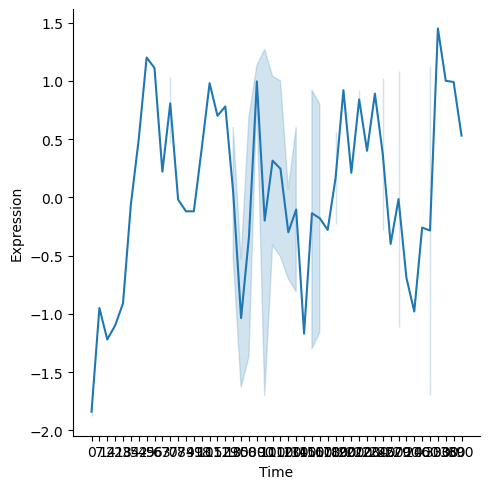

In [30]:
sns.relplot(data = ylong[ylong.Gene == "YGR108W"], x = "Time", y = "Expression", kind="line")

In [31]:
ylong.dtypes

Gene           object
Expt           object
Time           object
Expression    float64
dtype: object

In [33]:
ylong.Time = ylong.Time.astype(int)

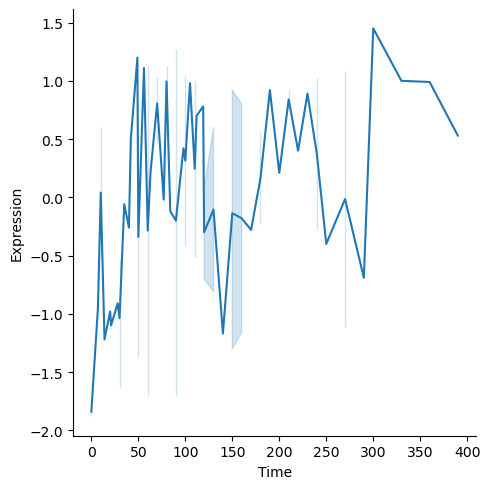

In [34]:
sns.relplot(data = ylong[ylong.Gene == "YGR108W"], x = "Time", y = "Expression", kind="line")

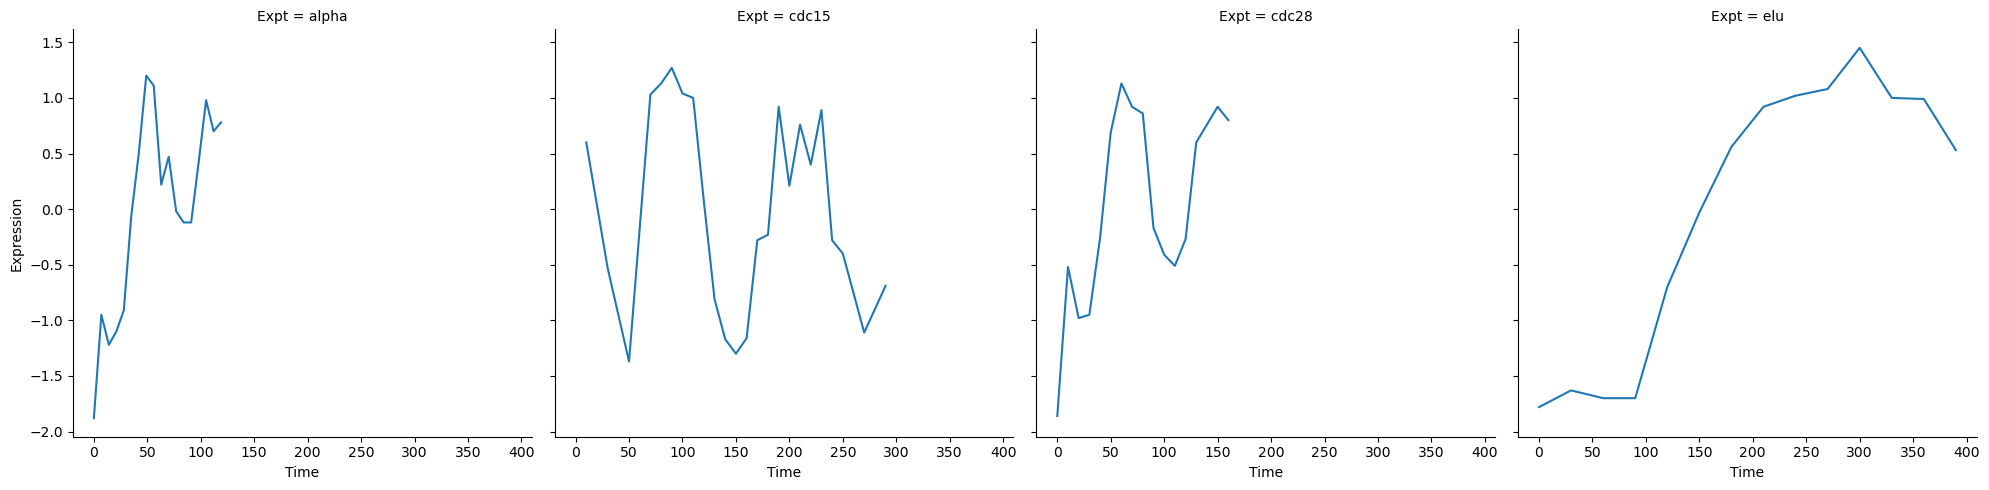

In [35]:
sns.relplot(data = ylong[ylong.Gene == "YGR108W"], 
            x = "Time", y = "Expression", 
            kind="line",
            col="Expt",
           )

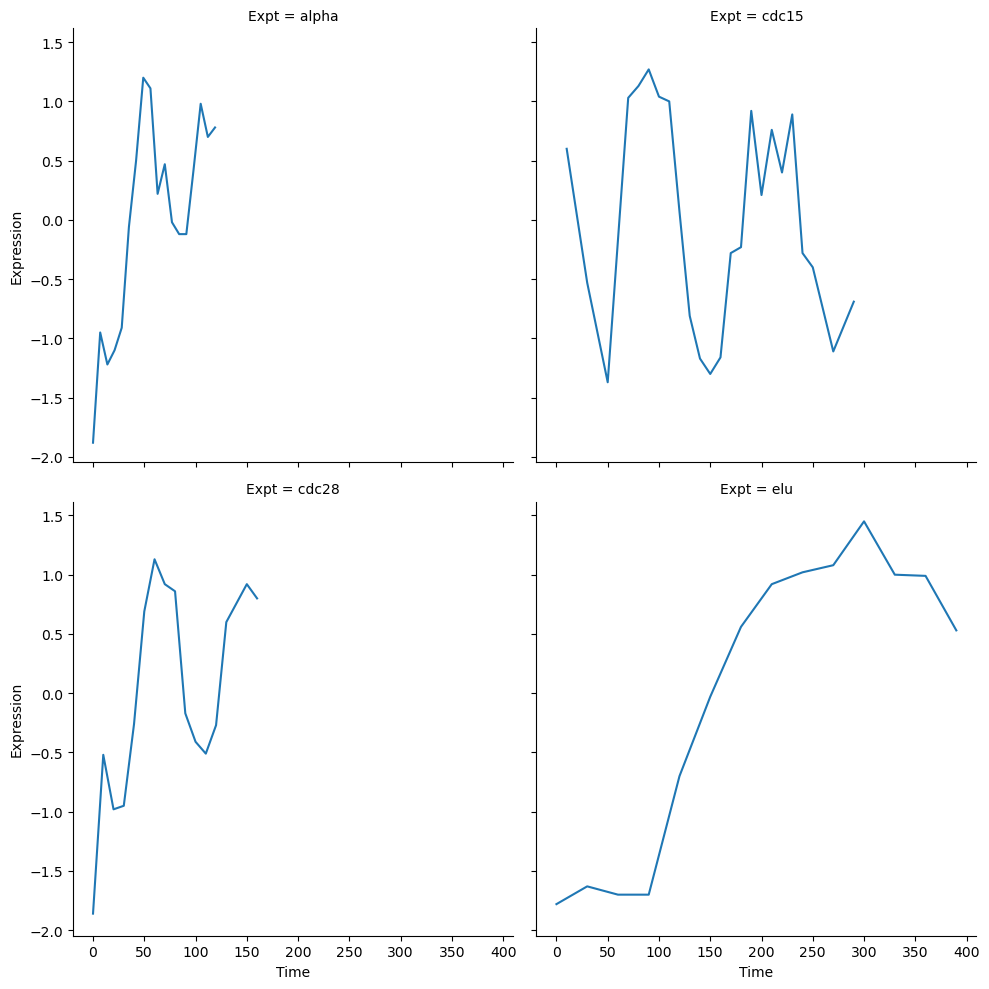

In [36]:
sns.relplot(data = ylong[ylong.Gene == "YGR108W"], 
            x = "Time", y = "Expression", 
            kind="line",
            col="Expt",
            col_wrap=2,
           )

### Depict relationship between two genes from long format data

In [37]:
CLB1 = "YGR108W" # clb1 -- cyclin regulating G2/M phase
CLB2 = "YPR119W"  # clb2 -- paralog of Clb1
CLN1 = "YMR199W"  # cln1 -- G1 cyclin

goi = [CLB1, CLB2, CLN1]

subgenes = ylong.query(f"Gene == {goi}")

In [38]:
subgenes.head(6)

,Gene,Expt,Time,Expression
2327,YGR108W,alpha,0,-1.88
4593,YMR199W,alpha,0,-1.56
6092,YPR119W,alpha,0,-2.36
8505,YGR108W,alpha,7,-0.95
10771,YMR199W,alpha,7,-0.93
12270,YPR119W,alpha,7,NaN


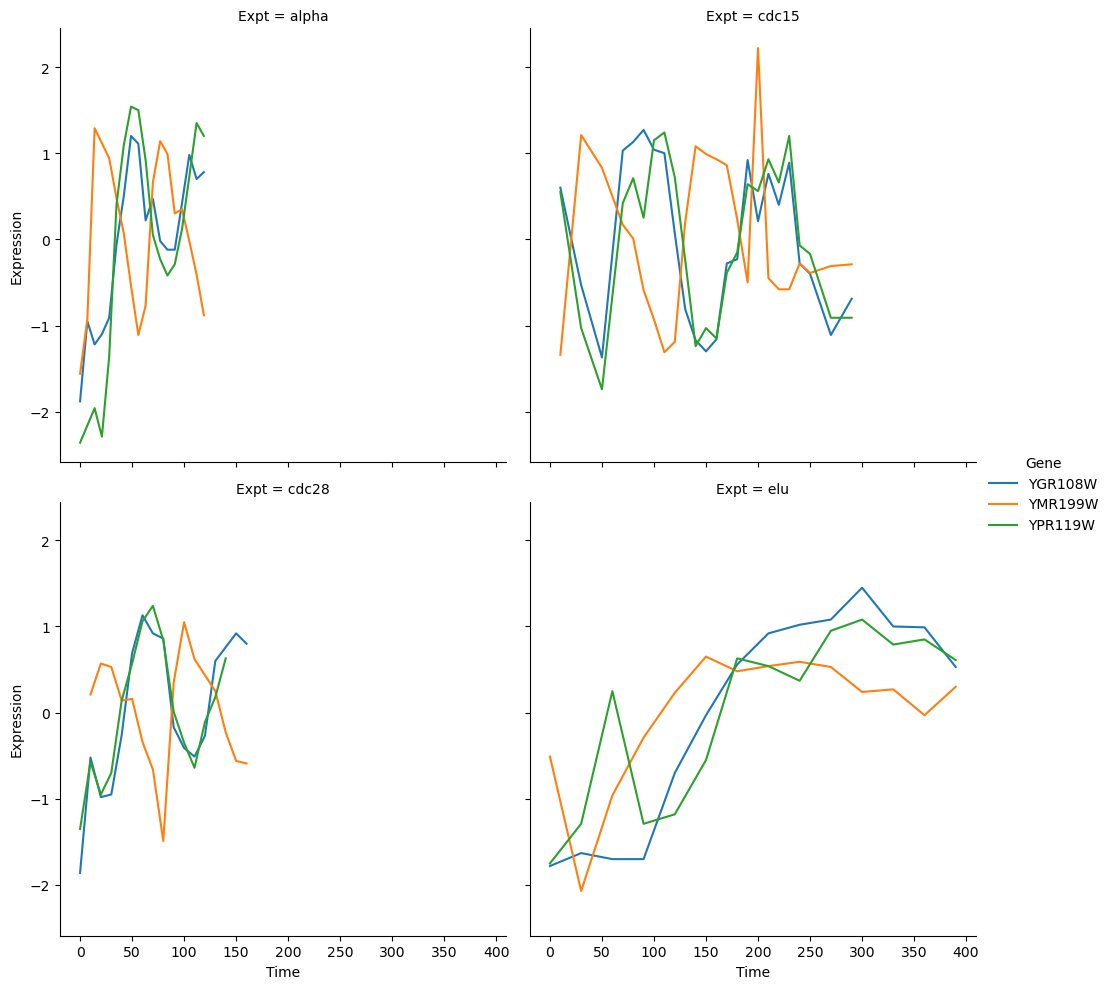

In [39]:
sns.relplot(data = subgenes, x = "Time", y = "Expression" , kind="line",
           hue = "Gene", col="Expt", col_wrap=2)

### Long to wide conversion using `pivot()`

In [40]:
psub = subgenes.pivot(index=["Expt","Time"],columns="Gene", values="Expression")
psub

Gene        YGR108W  YMR199W  YPR119W
Expt  Time                           
alpha 0       -1.88    -1.56    -2.36
      7       -0.95    -0.93      NaN
      14      -1.22     1.29    -1.96
      21      -1.10      NaN    -2.29
      28      -0.91     0.94    -1.36
...             ...      ...      ...
elu   270      1.08     0.53     0.95
      300      1.45     0.24     1.08
      330      1.00     0.27     0.79
      360      0.99    -0.03     0.85
      390      0.53     0.30     0.61

[73 rows x 3 columns]

In [41]:
psub.corr()

Gene,YGR108W,YMR199W,YPR119W
Gene,,,
YGR108W,1.000000,-0.146358,0.885766
YMR199W,-0.146358,1.000000,-0.310639
YPR119W,0.885766,-0.310639,1.000000


### Use wide data to depict relationships between genes

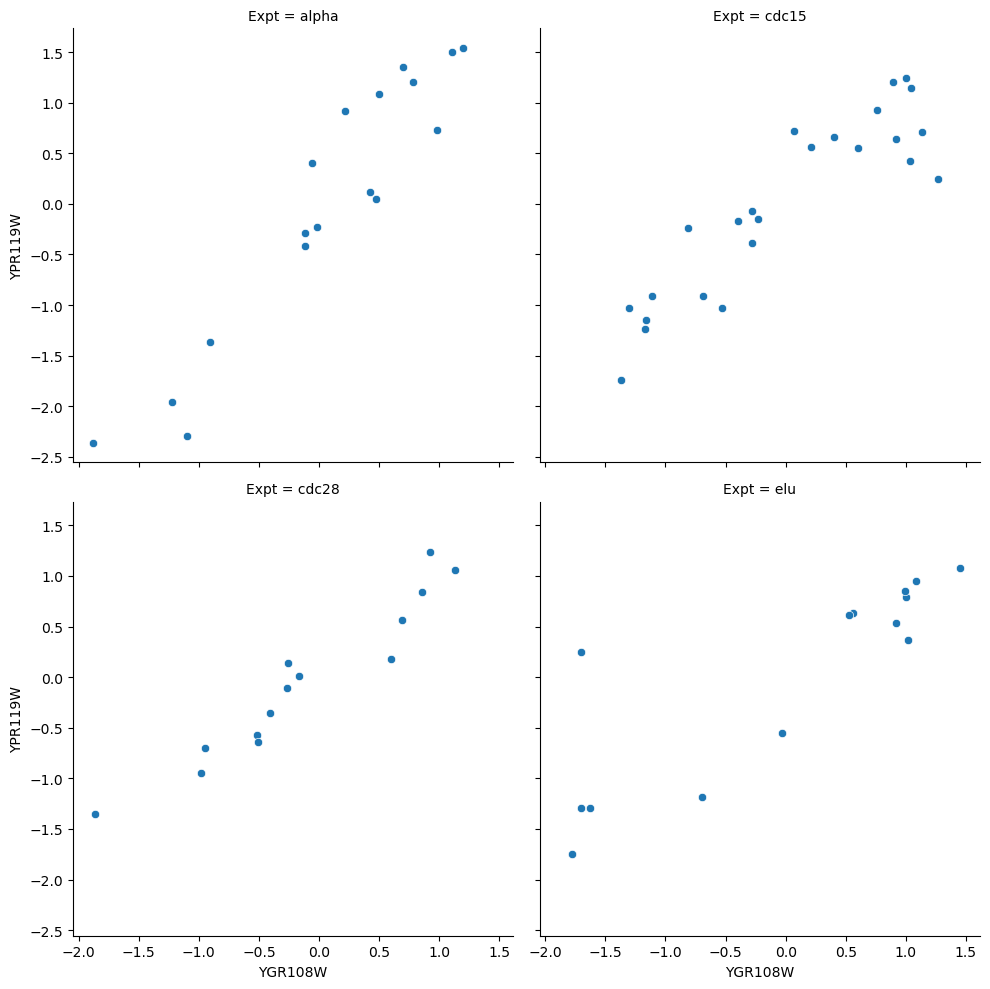

In [42]:
sns.relplot(data = psub,
            x = CLB1, y=CLB2,
            kind="scatter",
            col = "Expt",
            col_wrap = 2
           )

### Widen entire dataset

In [44]:
ywide = ylong.pivot(index=["Expt","Time"],columns="Gene", values="Expression")

In [45]:
ywide.head()

Gene        YAL001C  YAL002W  YAL003W  YAL004W  YAL005C  YAL007C  YAL008W  \
Expt  Time                                                                  
alpha 0       -0.15    -0.11    -0.14    -0.02    -0.05    -0.60    -0.28   
      7       -0.15     0.10    -0.71    -0.48    -0.53    -0.45    -0.22   
      14      -0.21     0.01     0.10    -0.11    -0.47    -0.13    -0.06   
      21       0.17     0.06    -0.32     0.12    -0.06     0.35     0.22   
      28      -0.42     0.04    -0.40    -0.03     0.11    -0.01     0.25   

Gene        YAL009W  YAL010C  YAL011W  ...  YPR195C  YPR196W  YPR197C  \
Expt  Time                             ...                              
alpha 0       -0.03    -0.05    -0.31  ...    -0.26     0.04    -0.11   
      7       -0.27     0.13    -0.43  ...     0.24     0.20    -0.16   
      14       0.17     0.13    -0.30  ...     0.10    -0.18     0.47   
      21      -0.12    -0.21    -0.23  ...      NaN     0.41     0.52   
      28      -0.27    -0.45    -0.13  ...     0.07    -0.13     0.13   

Gene        YPR198W  YPR199C  YPR200C  YPR201W  YPR202W  YPR203W  YPR204W  
Expt  Time                                                                 
alpha 0        0.23     0.14    -0.09     0.14    -0.79    -0.68    -0.37  
      7       -0.03     0.09     0.04      NaN    -0.25    -0.19    -0.48  
      14       0.43     0.25    -0.06     0.31     1.18     1.23     0.97  
      21      -0.06    -0.02    -0.07    -0.19     0.84     0.84     0.52  
      28       0.29     0.00    -0.16     0.08     0.19     0.14     0.18  

[5 rows x 6178 columns]

In [46]:
yeast_corr = ywide.corr()

In [47]:
yeast_corr.shape

(6178, 6178)

In [48]:
yeast_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6178 entries, YAL001C to YPR204W
Columns: 6178 entries, YAL001C to YPR204W
dtypes: float64(6178)
memory usage: 291.4+ MB


In [49]:
yeast_corr[CLB1].sort_values(ascending=False)[:10]

Gene
YGR108W      1.000000
YMR001C      0.890405
YPR119W      0.885766
YGL021W      0.875802
YLR131C      0.869480
YML035C-A    0.838003
YDR146C      0.797031
YML033W      0.784896
YLR190W      0.778291
YML034W      0.772014
Name: YGR108W, dtype: float64

### Read in a second table with information on yeast genes

In [50]:
orf_info = pd.read_csv("/Users/pmagwene/Downloads/yeast-ORF-info.csv")

In [51]:
orf_info.shape

(6610, 3)

In [52]:
orf_info.head()

,ftr.name,std.name,description
0,YAL069W,NaN,Dubious open reading frame; unlikely to encode...
1,YAL068W-A,NaN,Dubious open reading frame; unlikely to encode...
2,YAL068C,PAU8,Protein of unknown function; member of the ser...
3,YAL067W-A,NaN,Putative protein of unknown function; identifi...
4,YAL067C,SEO1,Putative permease; member of the allantoate tr...


In [53]:
orf_info.rename(columns={"ftr.name": "Gene", "std.name": "Name"}, inplace=True)
orf_info.head()

,Gene,Name,description
0,YAL069W,NaN,Dubious open reading frame; unlikely to encode...
1,YAL068W-A,NaN,Dubious open reading frame; unlikely to encode...
2,YAL068C,PAU8,Protein of unknown function; member of the ser...
3,YAL067W-A,NaN,Putative protein of unknown function; identifi...
4,YAL067C,SEO1,Putative permease; member of the allantoate tr...


In [54]:
clb1_high = yeast_corr.query(f"{CLB1} > 0.75").index

In [55]:
clb1_high

Index(['YBR038W', 'YCL012W', 'YDR146C', 'YGL021W', 'YGR108W', 'YHR023W',
       'YLR131C', 'YLR190W', 'YML033W', 'YML034W', 'YML035C-A', 'YMR001C',
       'YMR032W', 'YOR025W', 'YPL141C', 'YPR119W'],
      dtype='object', name='Gene')

In [56]:
clb1_coexpressed = ylong[ylong.Gene.isin(clb1_high)]

In [57]:
clb1_coexpressed.shape

(1168, 4)

In [58]:
clb1_coexpressed.head()

,Gene,Expt,Time,Expression
266,YBR038W,alpha,0,-1.20
545,YCL012W,alpha,0,-0.92
1143,YDR146C,alpha,0,-1.29
1976,YGL021W,alpha,0,-1.04
2327,YGR108W,alpha,0,-1.88


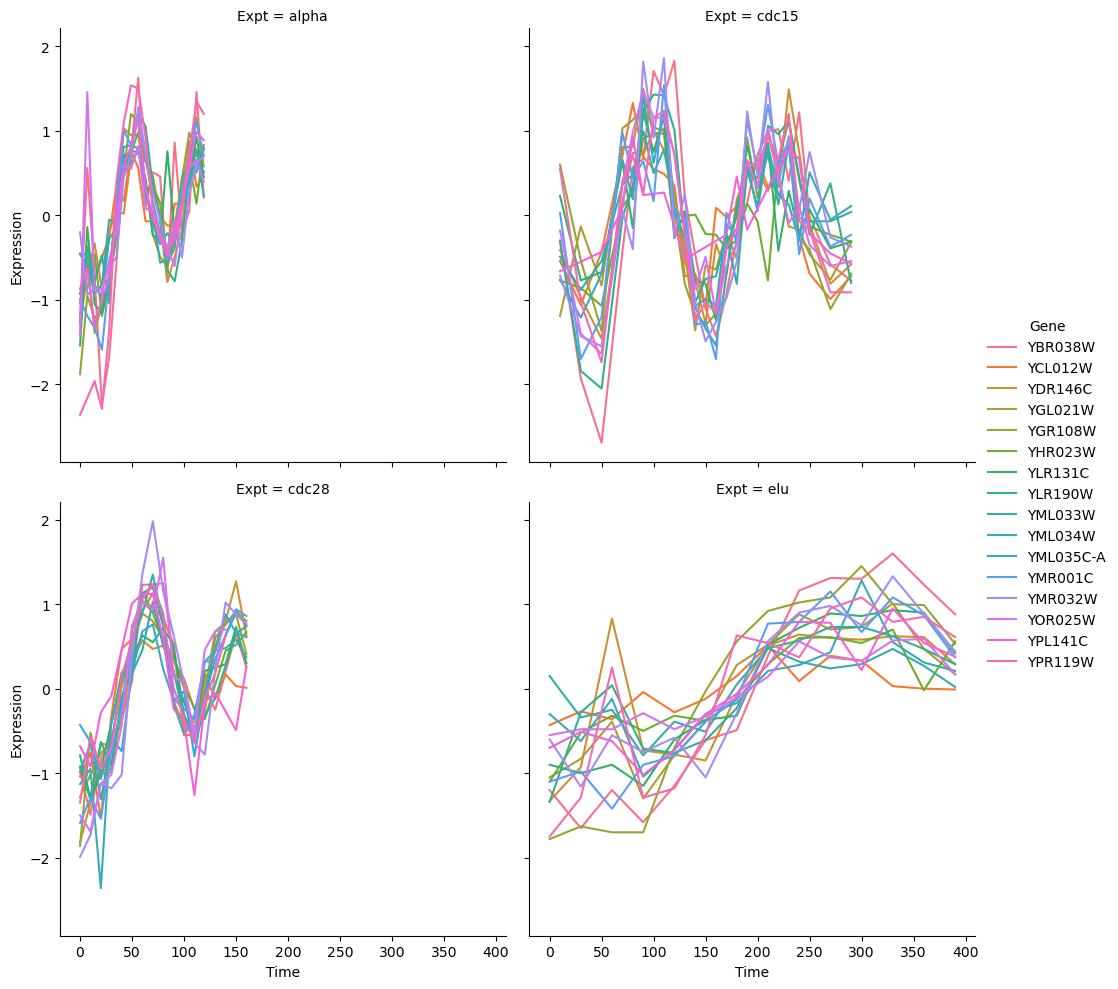

In [59]:
sns.relplot(data = clb1_coexpressed, x = "Time", y = "Expression" , kind="line",
           col="Expt", col_wrap=2, hue="Gene")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


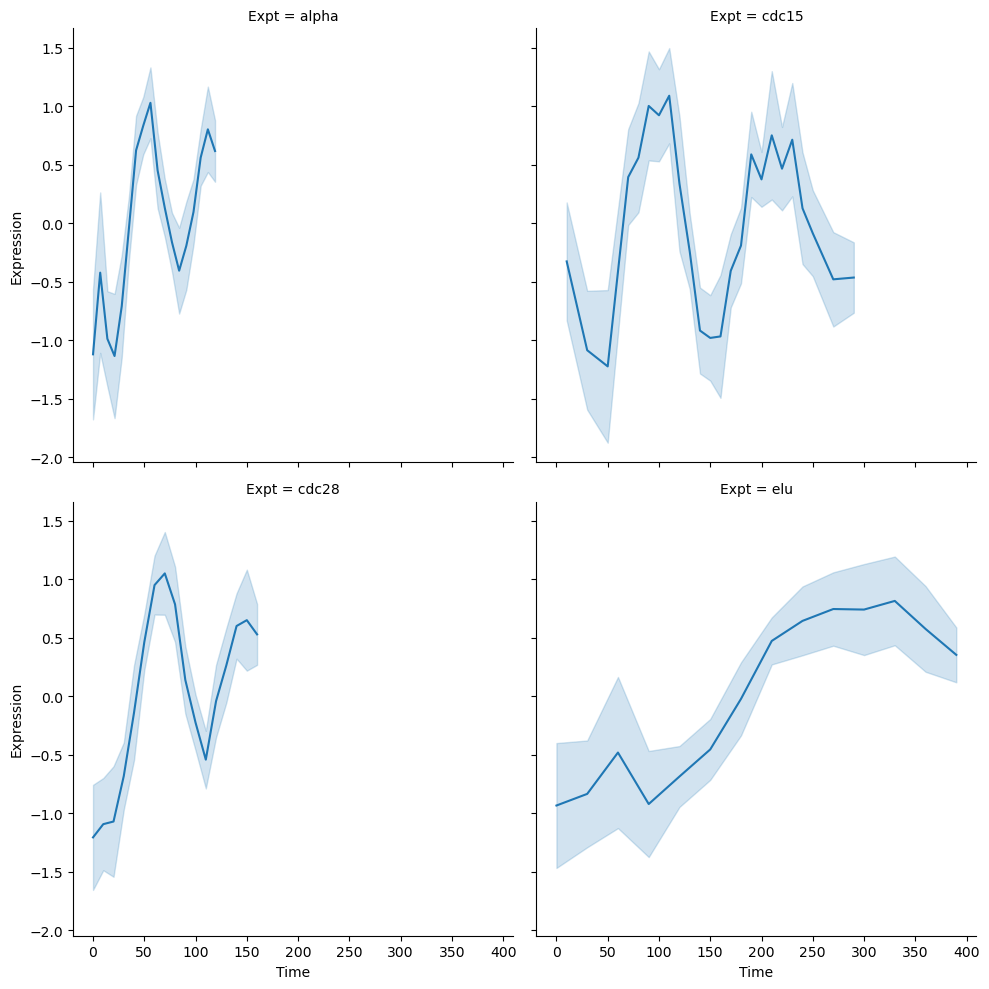

In [106]:
sns.relplot(data = clb1_coexpressed, x = "Time", y = "Expression" , kind="line",
           col="Expt", col_wrap=2,  errorbar="sd")

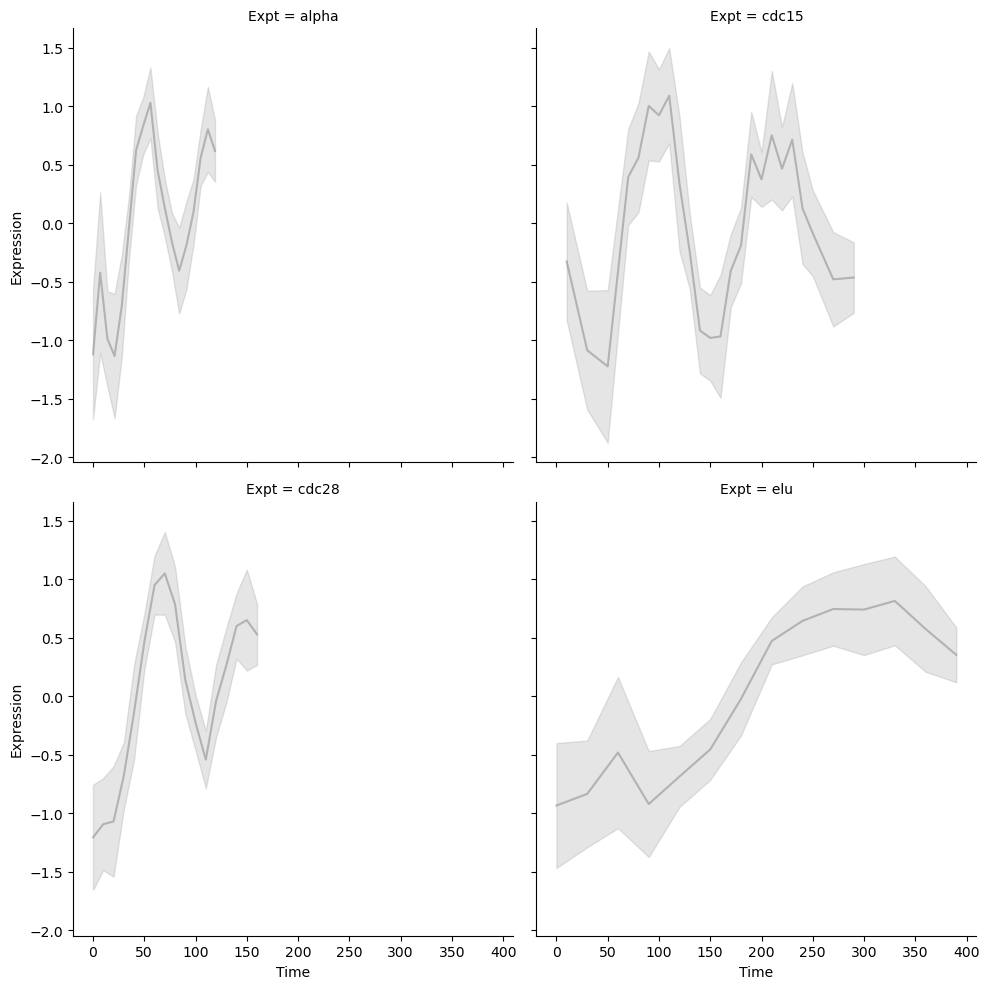

In [61]:
sns.relplot(data = clb1_coexpressed, x = "Time", y = "Expression" , kind="line",
           col="Expt", col_wrap=2, alpha=0.5, color="grey", 
           errorbar="sd")

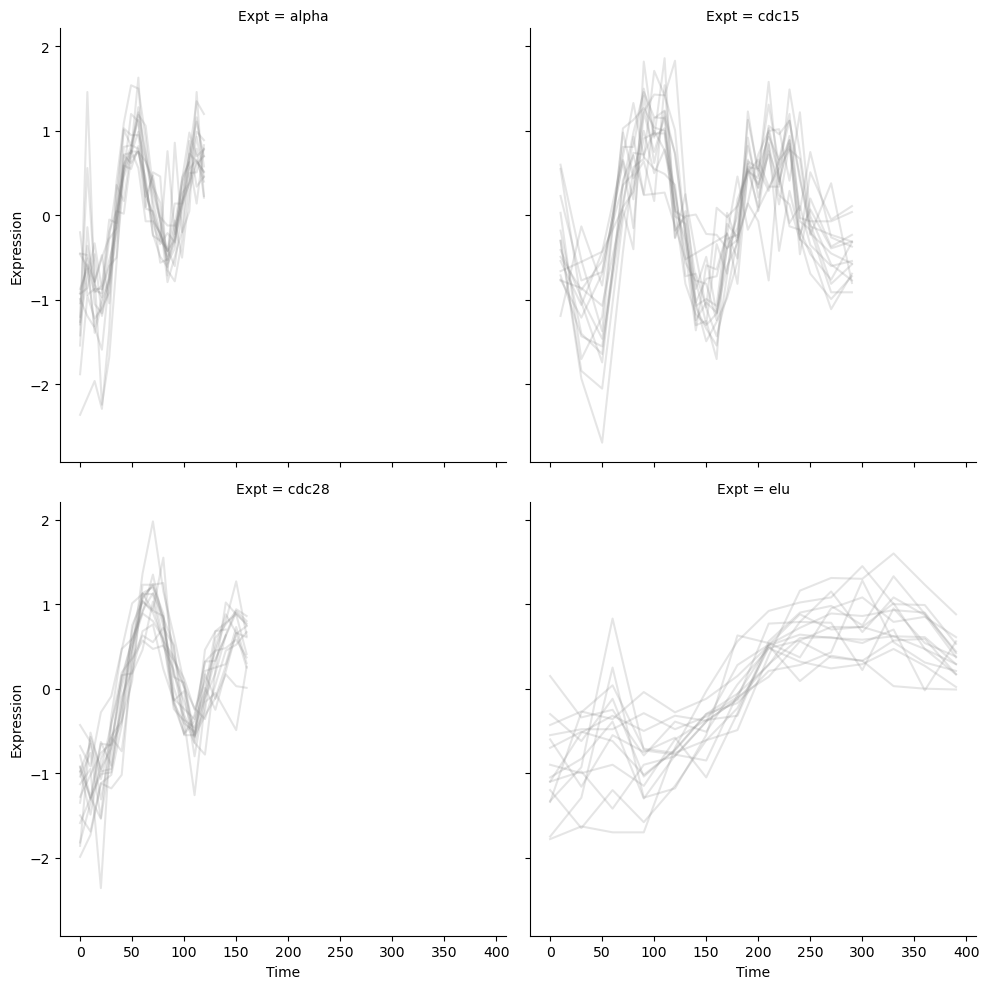

In [107]:
sns.relplot(data = clb1_coexpressed, x = "Time", y = "Expression" , kind="line",
           col="Expt", col_wrap=2, units="Gene", estimator=None, 
            color="gray", alpha=0.20)

In [63]:
yeast_corr.loc[clb1_high,clb1_high]

Gene,YBR038W,YCL012W,YDR146C,YGL021W,YGR108W,YHR023W,YLR131C,YLR190W,YML033W,YML034W,YML035C-A,YMR001C,YMR032W,YOR025W,YPL141C,YPR119W
Gene,,,,,,,,,,,,,,,,
YBR038W,1.000000,0.593914,0.768692,0.741334,0.761849,0.742838,0.772614,0.833580,0.679237,0.699838,0.792084,0.785259,0.782056,0.803789,0.746761,0.821772
YCL012W,0.593914,1.000000,0.729747,0.750791,0.752648,0.696374,0.655027,0.692314,0.763639,0.736822,0.646245,0.746164,0.642486,0.722293,0.744449,0.743639
YDR146C,0.768692,0.729747,1.000000,0.778986,0.797031,0.815659,0.731342,0.850082,0.765344,0.710106,0.780191,0.779895,0.802288,0.757965,0.699613,0.837052
YGL021W,0.741334,0.750791,0.778986,1.000000,0.875802,0.759719,0.844154,0.776186,0.864681,0.842595,0.831499,0.860573,0.783994,0.807026,0.795708,0.852798
YGR108W,0.761849,0.752648,0.797031,0.875802,1.000000,0.767473,0.869480,0.778291,0.784896,0.772014,0.838003,0.890405,0.770679,0.761748,0.765959,0.885766
YHR023W,0.742838,0.696374,0.815659,0.759719,0.767473,1.000000,0.716201,0.811146,0.748638,0.734594,0.841387,0.774520,0.794866,0.712370,0.759217,0.778767
YLR131C,0.772614,0.655027,0.731342,0.844154,0.869480,0.716201,1.000000,0.773341,0.790941,0.831454,0.761491,0.887045,0.813724,0.794498,0.729779,0.842496
YLR190W,0.833580,0.692314,0.850082,0.776186,0.778291,0.811146,0.773341,1.000000,0.784570,0.775394,0.836371,0.829456,0.850006,0.823217,0.743866,0.845542
YML033W,0.679237,0.763639,0.765344,0.864681,0.784896,0.748638,0.790941,0.784570,1.000000,0.893443,0.863923,0.880480,0.839489,0.772615,0.699865,0.791902


In [64]:
clb1_coexpressed.drop("Time",axis=1).groupby(["Gene","Expt"]).agg(["mean","std"])

Expression          
                       mean       std
Gene    Expt                         
YBR038W alpha -5.555556e-04  1.031535
        cdc15  1.666667e-03  1.140727
        cdc28  6.250000e-04  0.813433
        elu   -7.142857e-04  1.233653
YCL012W alpha  6.167906e-18  0.517948
...                     ...       ...
YPL141C elu    0.000000e+00  0.650396
YPR119W alpha -5.882353e-04  1.309740
        cdc15 -9.251859e-18  0.880203
        cdc28  1.480297e-17  0.766476
        elu    7.142857e-04  0.990769

[64 rows x 2 columns]

### Merge and Join

In [65]:
ftrs = pd.read_csv("/Users/pmagwene/Downloads/SGD_features.tsv", sep="\t")

In [66]:
ftrs.head()

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...
1,S000031098,CDS,NaN,NaN,NaN,NaN,YAL069W,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,NaN
2,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...
3,S000031372,CDS,NaN,NaN,NaN,NaN,YAL068W-A,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,NaN
4,S000121252,ARS,NaN,ARS102,NaN,ARSI-1,chromosome 1,NaN,1,707.0,776.0,NaN,NaN,11/18/14,2014-11-18|2007-03-07,Autonomously Replicating Sequence


In [67]:
pd.merge(orf_info, ftrs, left_on="Gene", right_on="Name")

,Gene_x,Name_x,description,SGDID,Type,Qualifier,Name_y,Gene_y,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
0,YAL069W,NaN,Dubious open reading frame; unlikely to encode...,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...
1,YAL068W-A,NaN,Dubious open reading frame; unlikely to encode...,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...
2,YAL068C,PAU8,Protein of unknown function; member of the ser...,S000002142,ORF,Verified,YAL068C,PAU8,seripauperin PAU8,chromosome 1,NaN,1,2169.0,1807.0,C,NaN,7/31/96,7/31/96,Protein of unknown function; member of the ser...
3,YAL067W-A,NaN,Putative protein of unknown function; identifi...,S000028593,ORF,Uncharacterized,YAL067W-A,NaN,NaN,chromosome 1,NaN,1,2480.0,2707.0,W,NaN,7/29/03,7/29/03,Putative protein of unknown function; identifi...
4,YAL067C,SEO1,Putative permease; member of the allantoate tr...,S000000062,ORF,Verified,YAL067C,SEO1,putative permease SEO1,chromosome 1,L000003363,1,9016.0,7235.0,C,NaN,2/3/11,7/31/96,Putative permease; member of the allantoate tr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605,YIR039C,YPS6,Putative GPI-anchored aspartic protease; membe...,S000001478,ORF,Verified,YIR039C,YPS6,aspartyl protease,chromosome 9,L000004386,9,432111.0,430498.0,C,NaN,2/3/11,12/10/94,Putative GPI-anchored aspartic protease; membe...
6606,YIR040C,NaN,Dubious open reading frame; unlikely to encode...,S000001479,ORF,Dubious,YIR040C,NaN,NaN,chromosome 9,NaN,9,433721.0,433389.0,C,NaN,2/3/11,12/10/94,Dubious open reading frame; unlikely to encode...
6607,YIR041W,PAU15,Protein of unknown function; member of the ser...,S000001480,ORF,Verified,YIR041W,PAU15,seripauperin PAU15,chromosome 9,NaN,9,433929.0,434303.0,W,NaN,2/3/11,12/10/94,Protein of unknown function; member of the ser...
6608,YIR042C,NaN,Putative protein of unknown function; YIR042C ...,S000001481,ORF,Uncharacterized,YIR042C,NaN,NaN,chromosome 9,NaN,9,435983.0,435273.0,C,NaN,2/3/11,12/10/94,Putative protein of unknown function; YIR042C ...


In [71]:
fsub = ftrs[ftrs.Name.isin(clb1_high)]

In [72]:
fsub.shape

(13, 16)

In [75]:
fsub.head(3)

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
2585,S000004121,ORF,Verified,YLR131C,ACE2,DNA-binding transcription factor ACE2,chromosome 12,L000000020,12,406822.0,404510.0,C,NaN,2/3/11,7/31/96,Transcription factor required for septum destr...
2822,S000004180,ORF,Verified,YLR190W,MMR1,NaN,chromosome 12,NaN,12,535214.0,536689.0,W,NaN,2/3/11,7/31/96,Phosphorylated protein of the mitochondrial ou...
3861,S000004497,ORF,Verified,YML034W,SRC1,HEH1|YML033W,chromosome 13,S000004496,13,209525.0,212155.0,W,NaN,11/10/98,1998-11-10|1996-07-31,Inner nuclear membrane protein; highly enriche...


In [77]:
"""

    ORF (mandatory) - Systematic name of the gene
    Gene (optional) - Gene name, if one exists
    SGDID (mandatory) - the SGDID, unique database identifier for the gene
    GO_Aspect (mandatory) - which ontology: P=Process, F=Function, C=Component
    GO Slim term (mandatory) - the name of the GO term that was selected as a GO Slim term
    GOID (optional) - the unique numerical identifier of the GO term
    Feature type (mandatory) - a description of the sequence feature, such as ORF or tRNA
"""

gnames = ["ORF","Gene","SGDID","GO_Aspect", "GO_Term", "GOID", "FType"]

GO = pd.read_table("go_slim_mapping.tab", sep="\t", names=gnames)
GO.head()

,ORF,Gene,SGDID,GO_Aspect,GO_Term,GOID,FType
0,CPX-1015,MET4-MET28-MET32 sulfur metabolism transcripti...,S000217642,F,DNA-binding transcription factor activity,GO:0003700,protein complex
1,CPX-1015,MET4-MET28-MET32 sulfur metabolism transcripti...,S000217642,P,biological process,GO:0008150,protein complex
2,CPX-1016,CBF1-MET4-MET28 sulfur metabolism transcriptio...,S000217643,F,DNA-binding transcription factor activity,GO:0003700,protein complex
3,CPX-1016,CBF1-MET4-MET28 sulfur metabolism transcriptio...,S000217643,P,biological process,GO:0008150,protein complex
4,CPX-1018,DRS2-CDC50 P4-ATPase complex,S000217644,F,ion binding,GO:0043167,protein complex


In [79]:
fsub.shape

(13, 16)

In [87]:
pd.merge(fsub, GO[GO.GO_Aspect=="P"], on="SGDID", how="left").head()

,SGDID,Type,Qualifier,Name,Gene_x,Alias,Parent,Secondary,Chromosome,Start,...,GeneticPosition,CoordVersion,SeqVersion,Description,ORF,Gene_y,GO_Aspect,GO_Term,GOID,FType
0,S000004121,ORF,Verified,YLR131C,ACE2,DNA-binding transcription factor ACE2,chromosome 12,L000000020,12,406822.0,...,NaN,2/3/11,7/31/96,Transcription factor required for septum destr...,YLR131C,ACE2,P,biological process,GO:0008150,ORF|Verified
1,S000004180,ORF,Verified,YLR190W,MMR1,NaN,chromosome 12,NaN,12,535214.0,...,NaN,2/3/11,7/31/96,Phosphorylated protein of the mitochondrial ou...,YLR190W,MMR1,P,mitochondrion organization,GO:0007005,ORF|Verified
2,S000004180,ORF,Verified,YLR190W,MMR1,NaN,chromosome 12,NaN,12,535214.0,...,NaN,2/3/11,7/31/96,Phosphorylated protein of the mitochondrial ou...,YLR190W,MMR1,P,organelle inheritance,GO:0048308,ORF|Verified
3,S000004497,ORF,Verified,YML034W,SRC1,HEH1|YML033W,chromosome 13,S000004496,13,209525.0,...,NaN,11/10/98,1998-11-10|1996-07-31,Inner nuclear membrane protein; highly enriche...,YML034W,SRC1,P,DNA metabolic process,GO:0006259,ORF|Verified
4,S000004497,ORF,Verified,YML034W,SRC1,HEH1|YML033W,chromosome 13,S000004496,13,209525.0,...,NaN,11/10/98,1998-11-10|1996-07-31,Inner nuclear membrane protein; highly enriche...,YML034W,SRC1,P,cellular nitrogen compound metabolic process,GO:0034641,ORF|Verified


In [91]:
alpha = clb1_coexpressed.query("Expt == 'alpha'")
elu = clb1_coexpressed.query("Expt == 'elu'")

In [92]:
# do whatever separate manipulations of that data

In [101]:
elu_alpha = pd.concat([elu,alpha])

In [102]:
alpha.shape

(288, 4)

In [103]:
elu.shape

(224, 4)

In [104]:
elu_alpha.shape

(512, 4)

In [105]:
elu_alpha.head()

,Gene,Expt,Time,Expression
364768,YBR038W,elu,0,-1.20
365047,YCL012W,elu,0,-0.43
365645,YDR146C,elu,0,-1.33
366478,YGL021W,elu,0,-1.05
366829,YGR108W,elu,0,-1.78
